Modified from https://github.com/ritvikmath/Time-Series-Analysis/blob/master/Model%20Selection.ipynb

In [2]:
import pandas as pd
from datetime import datetime
import numpy as np
import matplotlib.pyplot as plt
from statsmodels.graphics.tsaplots import plot_acf, plot_pacf
from statsmodels.tsa.arima_model import ARMA
from statsmodels.tsa.stattools import adfuller

In [3]:
def parser(s):
    return datetime.strptime(s, '%Y-%m-%d')

In [4]:
def perform_adf_test(series):
    result = adfuller(series)
    print('ADF Statistic: %f' % result[0])
    print('p-value: %f' % result[1])

In [5]:
#get data
series = pd.read_csv('data/catfish.csv', parse_dates=[0], index_col=0, date_parser=parser)
series = series.asfreq(pd.infer_freq(series.index))
series = series.loc[datetime(2004,1,1):]
series = series.diff().diff().dropna()

C:\Users\salmank\AppData\Local\Temp\ipykernel_22336\1377475750.py:2: FutureWarning: The argument 'date_parser' is deprecated and will be removed in a future version. Please use 'date_format' instead, or read your data in as 'object' dtype and then call 'to_datetime'.
  series = pd.read_csv('data/catfish.csv', parse_dates=[0], index_col=0, date_parser=parser)


In [6]:
#check stationarity
perform_adf_test(series)

ADF Statistic: -7.162321
p-value: 0.000000


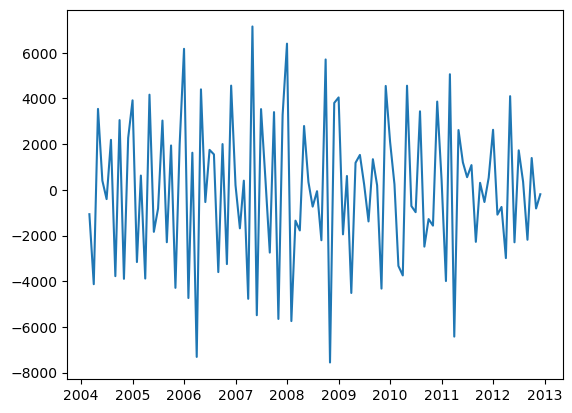

In [7]:
plt.plot(series)

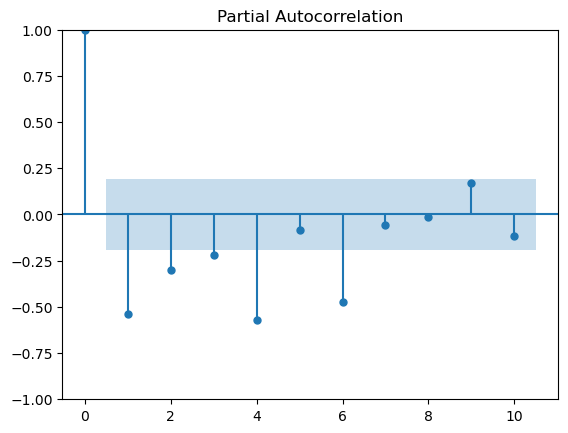

In [8]:
plot_pacf(series, lags=10)
plt.show()

# Either AR(1), AR(4), AR(6), or AR(10)

In [9]:
plt.figure(figsize=(12,12))

ar_orders = [1, 4, 6, 10]
fitted_model_dict = {}

for idx, ar_order in enumerate(ar_orders):
    
    #create AR(p) model
    ar_model = ARMA(series, order=(ar_order,0))
    ar_model_fit = ar_model.fit()
    fitted_model_dict[ar_order] = ar_model_fit
    plt.subplot(4,1,idx+1)
    plt.plot(series)
    plt.plot(ar_model_fit.fittedvalues)
    plt.title('AR(%s) Fit'%ar_order, fontsize=16)

plt.tight_layout()

NotImplementedError: 
statsmodels.tsa.arima_model.ARMA and statsmodels.tsa.arima_model.ARIMA have
been removed in favor of statsmodels.tsa.arima.model.ARIMA (note the .
between arima and model) and statsmodels.tsa.SARIMAX.

statsmodels.tsa.arima.model.ARIMA makes use of the statespace framework and
is both well tested and maintained. It also offers alternative specialized
parameter estimators.


<Figure size 1200x1200 with 0 Axes>

# Each model has: 

## a log likelihood ($l$)
## a number of parameters ($k$)
## a number of samples used for fitting ($n$)

# AIC = 2$k$ - 2$l$

## Lower AIC via higher log likelihood or less parameters

# BIC = $\ln(n)k$ - 2$l$

## Lower BIC via higher log likelihood or less parameters or less samples used in fitting

In [9]:
#AIC comparison
for ar_order in ar_orders:
    print('AIC for AR(%s): %s'%(ar_order, fitted_model_dict[ar_order].aic))

AIC for AR(1): 1980.8563105422684
AIC for AR(4): 1927.4507590389182
AIC for AR(6): 1899.630265985839
AIC for AR(10): 1902.2647912124996


## Based on AIC criteria, pick AR(6)

In [10]:
#BIC comparison
for ar_order in ar_orders:
    print('BIC for AR(%s): %s'%(ar_order, fitted_model_dict[ar_order].bic))

BIC for AR(1): 1988.8466278246046
BIC for AR(4): 1943.4313936035905
BIC for AR(6): 1920.9377787387357
BIC for AR(10): 1934.2260603418445


## Based on BIC criteria, pick AR(6)